## Importing Some Important Libraries.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [2]:
df = pd.read_csv(r"D:\PYTHON1\Capstone Project\CAR DETAILS.csv")

## Reading the data.

In [3]:
df.head() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

## Data Preprocessing 

**1) Handling Null Values**

In [5]:
df.isna().sum().sum()

0

**2) Handling Duplicates Values**

In [6]:
df.duplicated().sum()

763

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(3577, 8)

**3) Handling redundant features**

In [10]:
print(df['fuel'].nunique())
print(df['km_driven'].nunique())
print(df['name'].nunique())
print(df['owner'].nunique())
print(df['seller_type'].nunique())
print(df['seller_type'].nunique())
print(df['selling_price'].nunique())
print(df['transmission'].nunique())
print(df['year'].nunique())

5
770
1491
5
3
3
445
2
27


* Their is not any redundant features are present in the data.

**4) Checking Data Types**

In [11]:
df.dtypes 

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

**5) Checking data consistency**

In [12]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


**6) Feature Engineering**

In [13]:
df['brands'] = df['name'].str.split().str[0]
df['models'] = df['name'].str.split().str[:3].apply(' '.join)

In [14]:
df.drop('name', axis = 1, inplace=True)
df.head() 

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brands,models
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,Maruti 800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Maruti Wagon R
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Hyundai Verna 1.6
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,Datsun RediGO T
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Honda Amaze VX


**7) Separating Numerical columns and Categorical features** 

In [15]:
cat_cols = df.dtypes[df.dtypes == 'object'].index
num_cols = df.dtypes[df.dtypes != 'object'].index
print(cat_cols)
print(num_cols) 

Index(['fuel', 'seller_type', 'transmission', 'owner', 'brands', 'models'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


In [16]:
for i in cat_cols:
    print(f'Features: {i} | Unique Count: {df[i].nunique()}')

Features: fuel | Unique Count: 5
Features: seller_type | Unique Count: 3
Features: transmission | Unique Count: 2
Features: owner | Unique Count: 5
Features: brands | Unique Count: 29
Features: models | Unique Count: 613


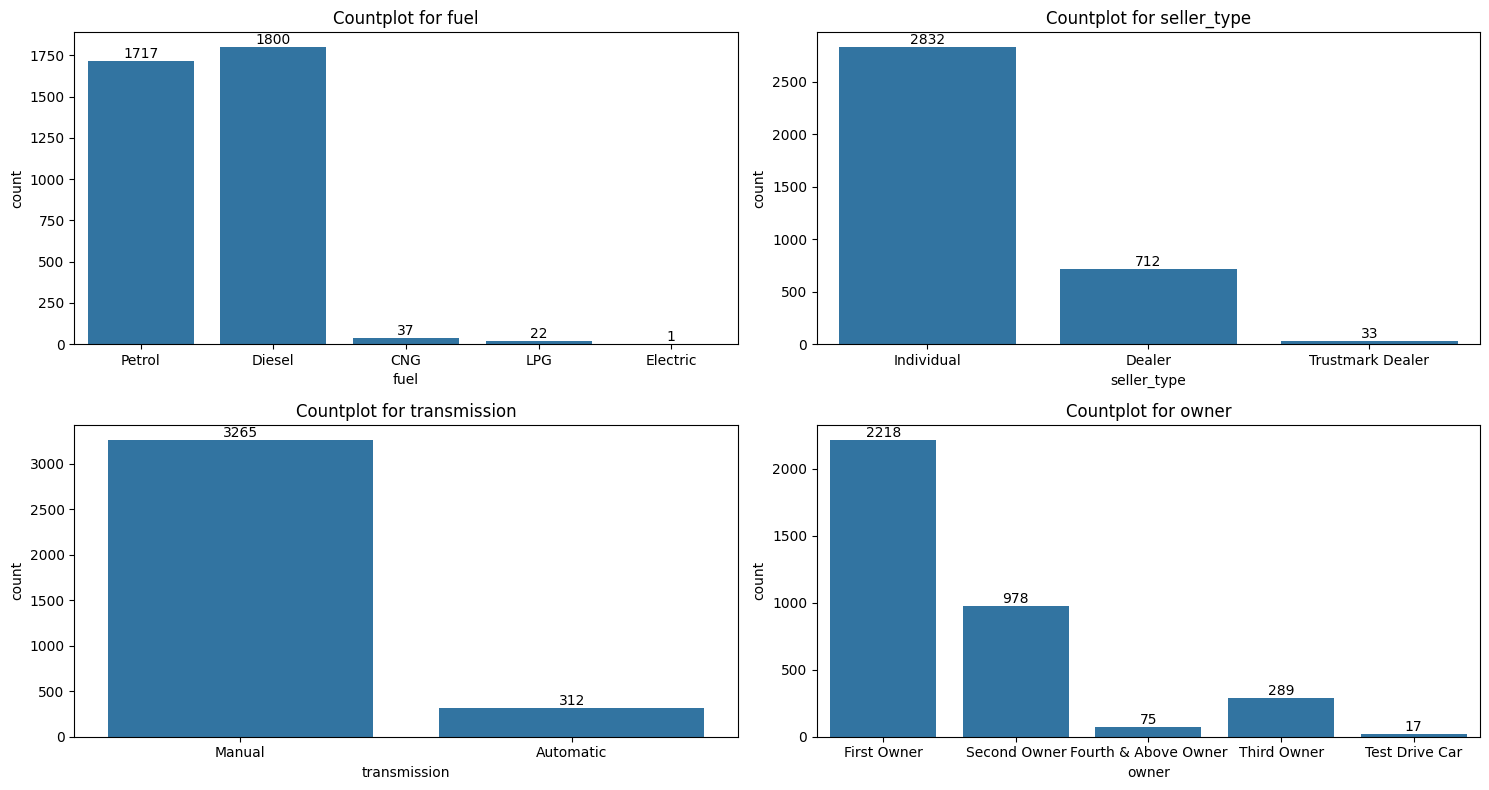

In [17]:
cols = ['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(15,8))
for i in range(len(cols)):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.tight_layout() 
plt.show() 

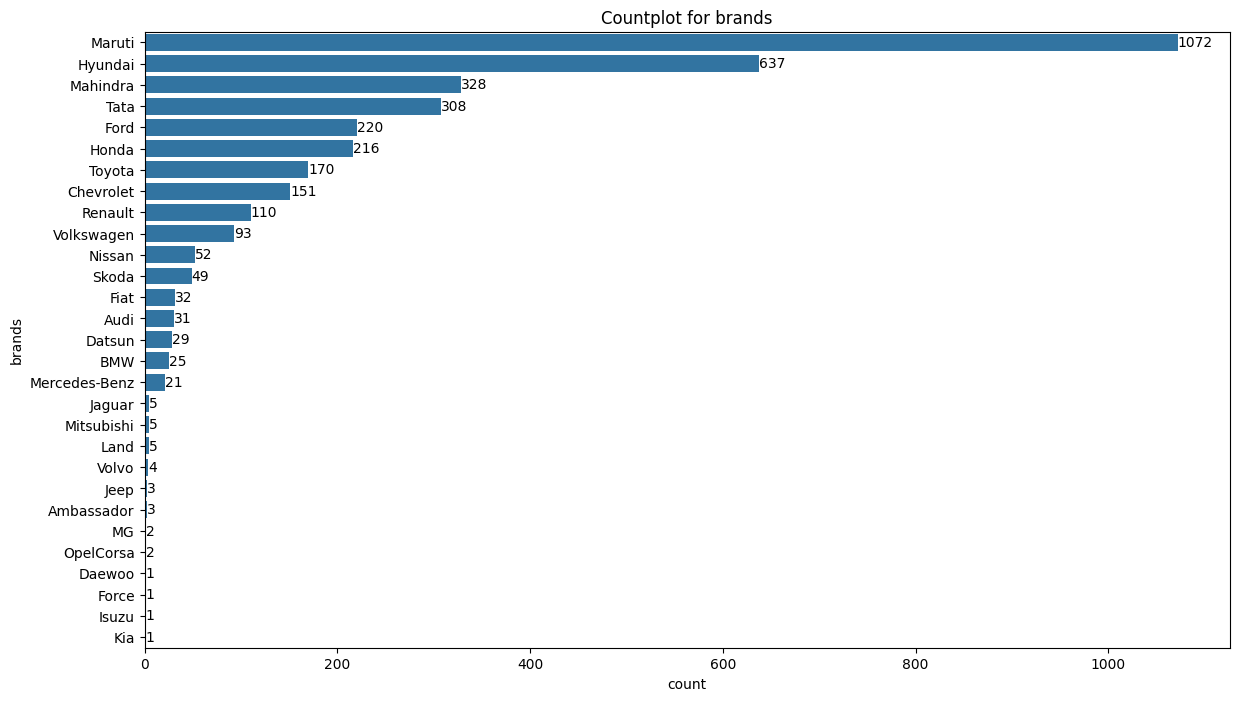

In [18]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y=df['brands'],
                   order=df['brands'].value_counts().sort_values(ascending=False).index)
ax.bar_label(ax.containers[0])
plt.title('Countplot for brands')
plt.show() 

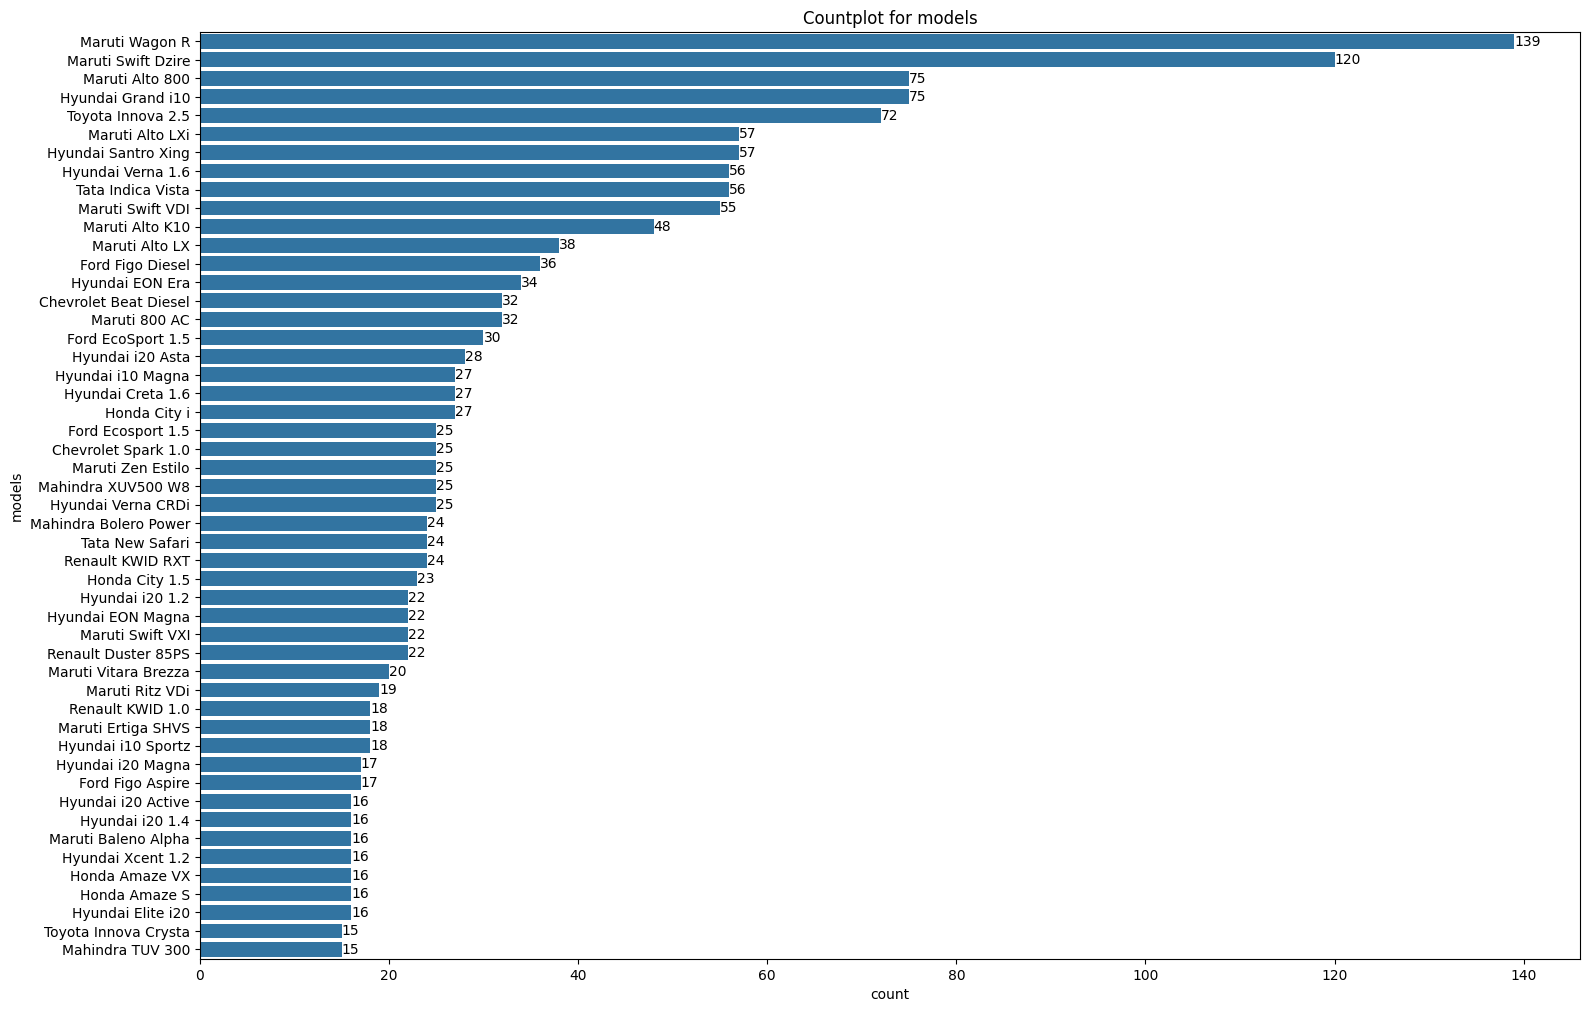

In [19]:
plt.figure(figsize=(16,10))
ax = sns.countplot(y=df['models'],
                   order=df['models'].value_counts()[:50].sort_values(ascending=False).index)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.title('Countplot for models') 
plt.show() 

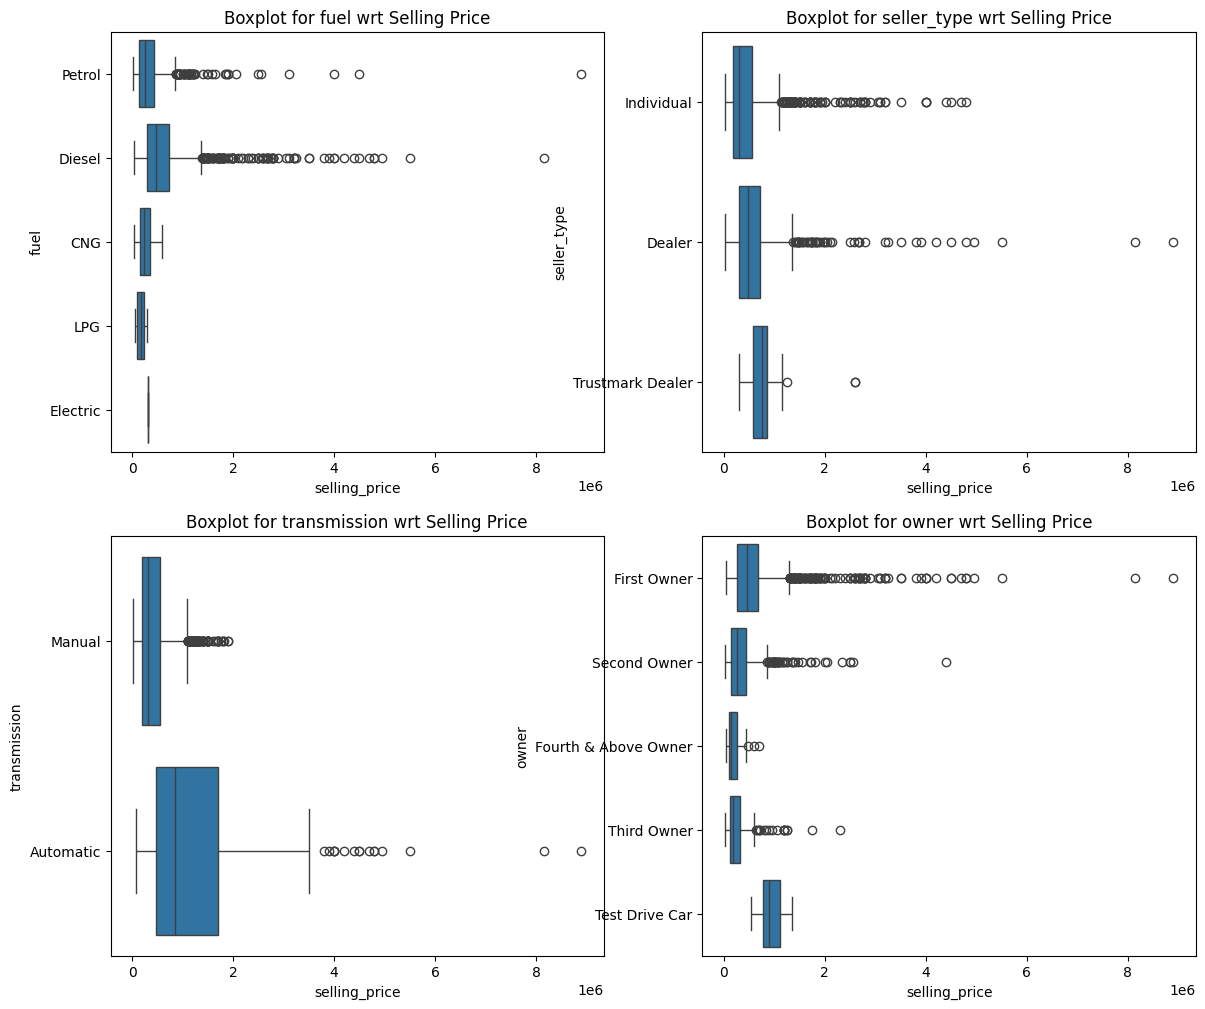

In [20]:
cols = ['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(14,12))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df['selling_price'],y=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]} wrt Selling Price')
plt.show() 

In [21]:
for i in num_cols:
    print(f'Features: {i} | Unique Count: {df[i].nunique()}')

Features: year | Unique Count: 27
Features: selling_price | Unique Count: 445
Features: km_driven | Unique Count: 770


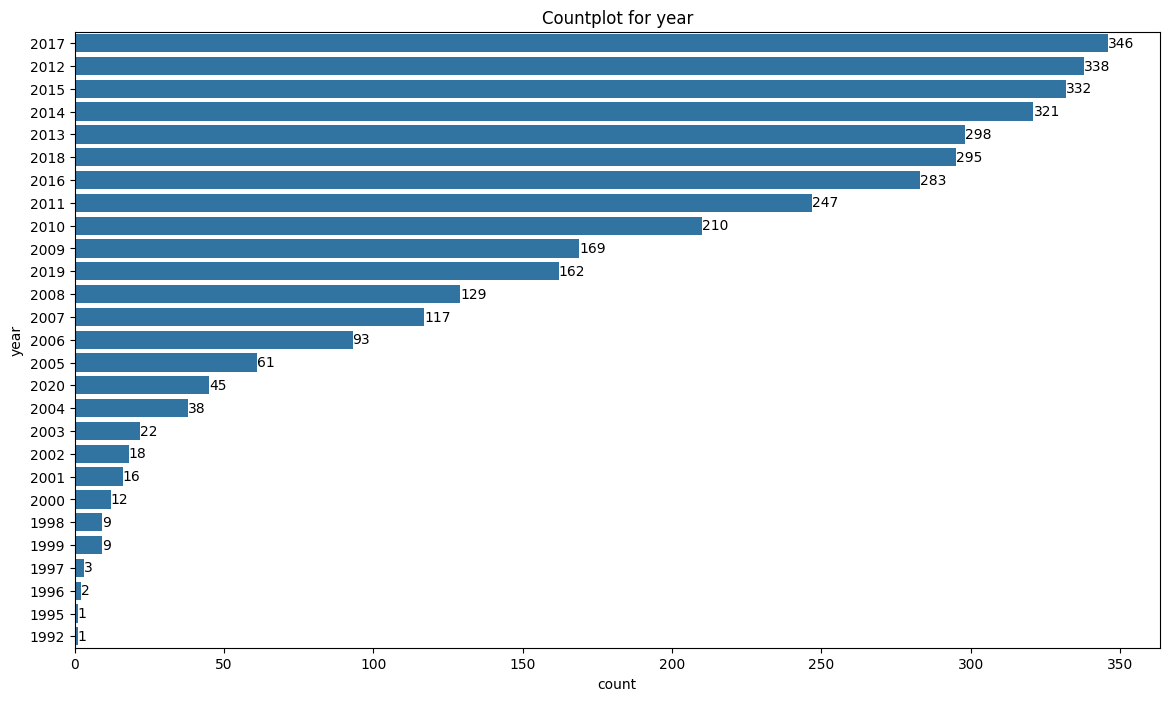

In [22]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y=df['year'],
                   order=df['year'].value_counts().sort_values(ascending=False).index)
ax.bar_label(ax.containers[0])
plt.title('Countplot for year')
plt.show() 

**8) Checking Correlation**

In [23]:
corr = df[num_cols].corr()
corr

,year,selling_price,km_driven
year,1.00000,0.424260,-0.417490
selling_price,0.42426,1.000000,-0.187359
km_driven,-0.41749,-0.187359,1.000000


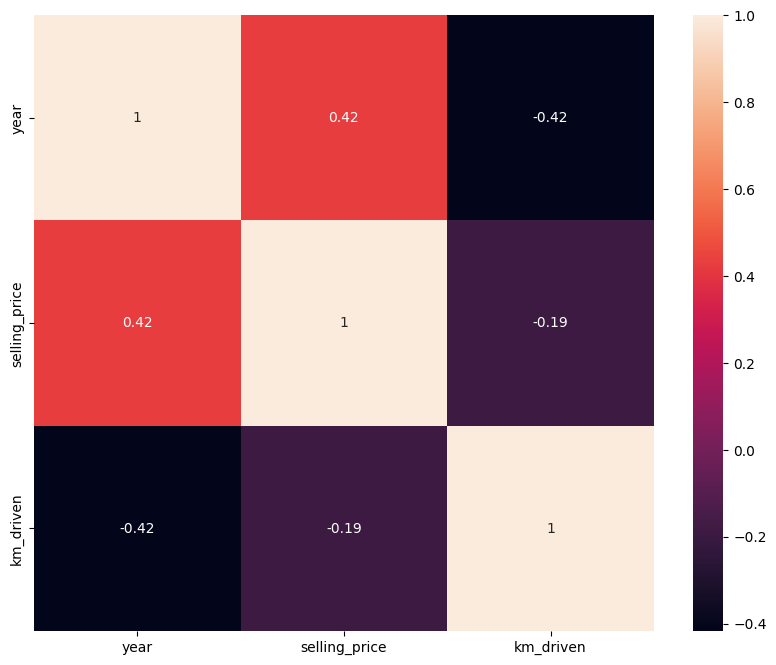

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()   

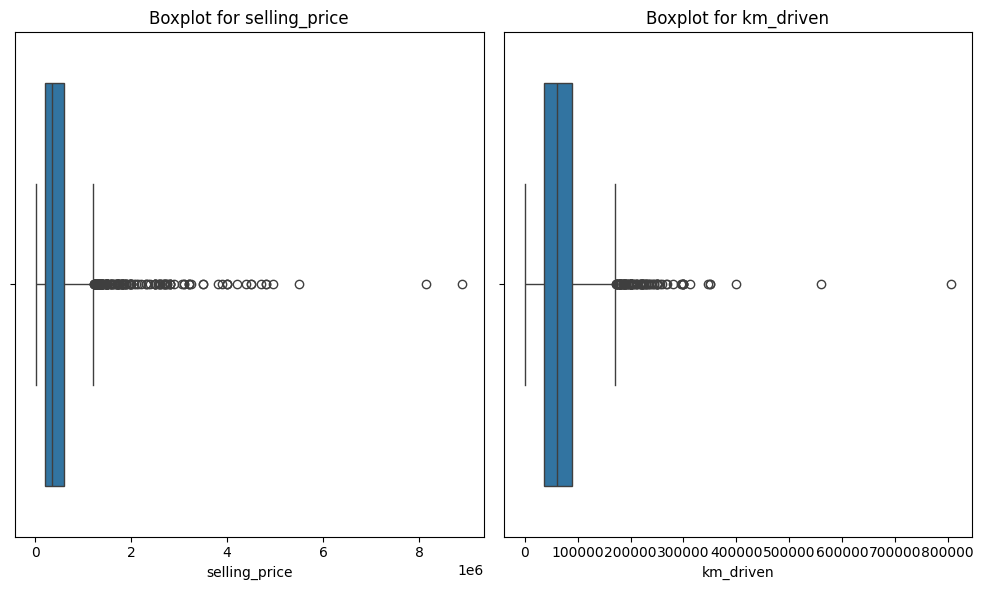

In [25]:
cols = ['selling_price', 'km_driven']
plt.figure(figsize=(10,6))

for i in range(len(cols)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()


**9) Handling Outliers**

In [26]:
a = df[['km_driven','selling_price']].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,50%,95%,98%,99%,max
km_driven,1.0,1744.08,5000.0,6525.2,10000.0,60000.0,149534.8,193440.0,223158.4,806599.0
selling_price,20000.0,51786.64,60000.0,70000.0,80000.0,350000.0,1200000.0,1800000.0,2675000.0,8900000.0


In [27]:
df['selling_price'] = np.where(df['selling_price']>2675000.0,2675000.0,df['selling_price'])
df['km_driven'] = np.where(df['km_driven']>223158.4,223158.4,df['km_driven'])

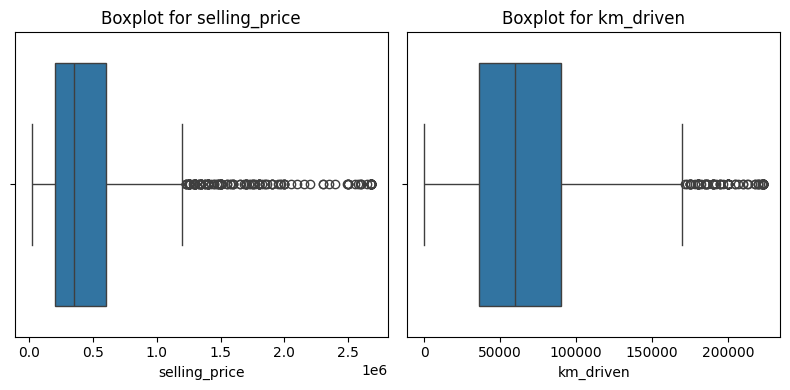

In [28]:
cols = ['selling_price', 'km_driven']
plt.figure(figsize=(8,4))

for i in range(len(cols)):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

**10) Lable Encoding**

In [29]:
df.dtypes

year               int64
selling_price    float64
km_driven        float64
fuel              object
seller_type       object
transmission      object
owner             object
brands            object
models            object
dtype: object

In [30]:
for i in cat_cols:
    print(i, df[i].nunique()) 

fuel 5
seller_type 3
transmission 2
owner 5
brands 29
models 613


In [31]:
df['brands'].value_counts() 

brands
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

#### Making Copy of data

In [32]:
df1 = df.copy()

In [33]:
df['brands'] = df['brands'].replace(['Jaguar','Mitsubishi','Land','Volvo','Jeep','Ambassador','MG',
                                     'OpelCorsa','Daewoo','Force','Isuzu','Kia'], 'Others')

In [34]:
df['brands'].value_counts()

brands
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Others             33
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Name: count, dtype: int64

In [35]:
len(df['models'].value_counts().sort_values(ascending=False))

613

In [36]:
df['models'].value_counts().sort_values(ascending=False)[:17]

models
Maruti Wagon R           139
Maruti Swift Dzire       120
Maruti Alto 800           75
Hyundai Grand i10         75
Toyota Innova 2.5         72
Maruti Alto LXi           57
Hyundai Santro Xing       57
Hyundai Verna 1.6         56
Tata Indica Vista         56
Maruti Swift VDI          55
Maruti Alto K10           48
Maruti Alto LX            38
Ford Figo Diesel          36
Hyundai EON Era           34
Chevrolet Beat Diesel     32
Maruti 800 AC             32
Ford EcoSport 1.5         30
Name: count, dtype: int64

In [37]:
df['models'].value_counts().sort_values(ascending=False)[17:]

models
Hyundai i20 Asta        28
Hyundai i10 Magna       27
Hyundai Creta 1.6       27
Honda City i            27
Chevrolet Spark 1.0     25
                        ..
Maruti S-Cross Delta     1
Maruti Celerio ZDi       1
Maruti Omni Maruti       1
OpelCorsa 1.4 GL         1
Tata Nano XM             1
Name: count, Length: 596, dtype: int64

In [38]:
top_17_models = df['models'].value_counts().nlargest(17).index
df['models'] = df['models'].apply(lambda x: x if x in top_17_models else 'Other')

In [39]:
model_counts = df['models'].value_counts().reset_index()
model_counts.columns = ['model', 'count']

In [40]:
df['models'].value_counts()

models
Other                    2565
Maruti Wagon R            139
Maruti Swift Dzire        120
Hyundai Grand i10          75
Maruti Alto 800            75
Toyota Innova 2.5          72
Hyundai Santro Xing        57
Maruti Alto LXi            57
Hyundai Verna 1.6          56
Tata Indica Vista          56
Maruti Swift VDI           55
Maruti Alto K10            48
Maruti Alto LX             38
Ford Figo Diesel           36
Hyundai EON Era            34
Chevrolet Beat Diesel      32
Maruti 800 AC              32
Ford EcoSport 1.5          30
Name: count, dtype: int64

## **EDA**

#### **Univariate Data Analysis of Numerical Columns.**

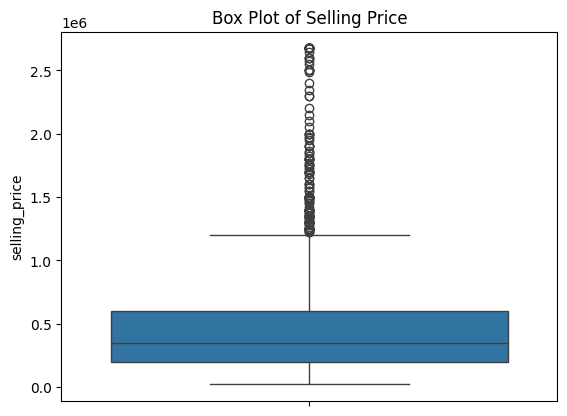

In [41]:
sns.boxplot(df['selling_price'])
plt.title("Box Plot of Selling Price")
plt.show()

**Insights:-**

1. Central Tendency : It represents the typical selling price.

2. Outliers : These outliers could be valuable transactions.

3. Variability: 
* The spread of data points between the lower and upper quartiles indicates considerable variation in selling prices. 
* Some properties sell for much less or much more than the median.


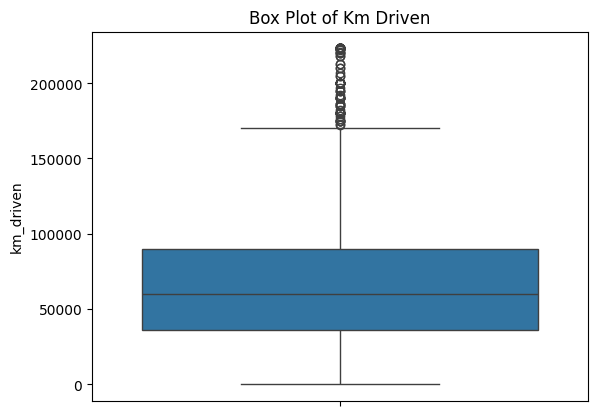

In [42]:
sns.boxplot(df['km_driven'])
plt.title("Box Plot of Km Driven")
plt.show()

**Insights:-**
1. The median value of kilometers driven is around 75,000 km, as indicated by the line within the blue box.

2. There is a significant spread in the data from approximately 25,000 km to around 125,000 km, which suggests variability in how much vehicles have been driven.

3. Numerous outliers above the upper whisker extend up to 200,000 km or more, indicating that some vehicles have been driven substantially more than average. 

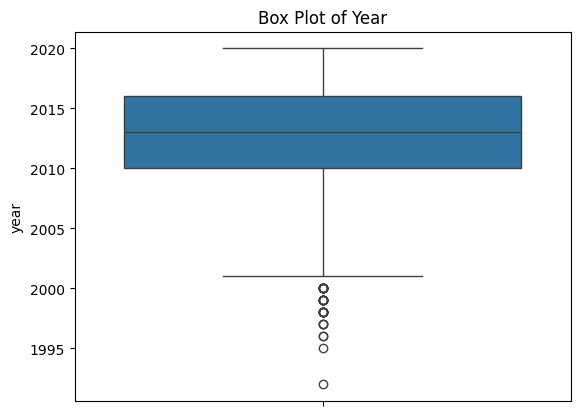

In [43]:
sns.boxplot(df['year'])
plt.title("Box Plot of Year")
plt.show()

**Insights:-**

1. Central Tendency: The median year lies around 2010 and 2015, as indicated by the line within the interquartile range (IQR).

2. Spread: The years span approximately three decades, from around 1995 to 2020. Notably, there are some potential outliers in earlier years.

3. Skewness: The distribution appears slightly skewed toward more recent years, as there’s more space between the third quartile (Q3) and the maximum than between Q1 and the minimum.

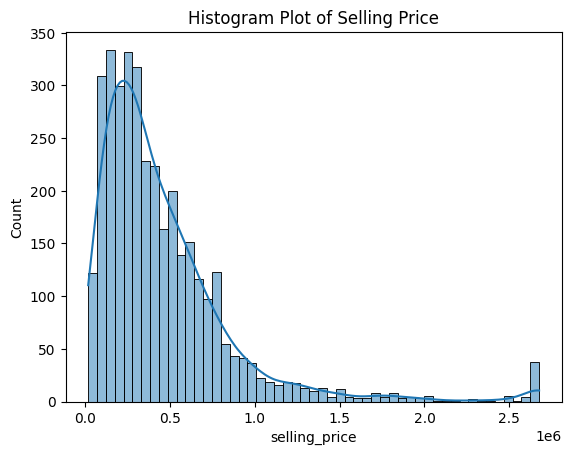

In [44]:
sns.histplot(df['selling_price'],kde=True)
plt.title("Histogram Plot of Selling Price")
plt.show()

**Insights:-**

1. Highest Frequency: Most items are sold at lower prices, as indicated by the highest frequency falling within the lowest price range.

2. Decline in Frequency: As the selling price increases, the frequency rapidly declines. Higher-priced items are less common.

3. Rare High-Priced Sales: There are very few items with a selling price above 2 units on this scale, suggesting that such high-priced sales are rare occurrences in this dataset.

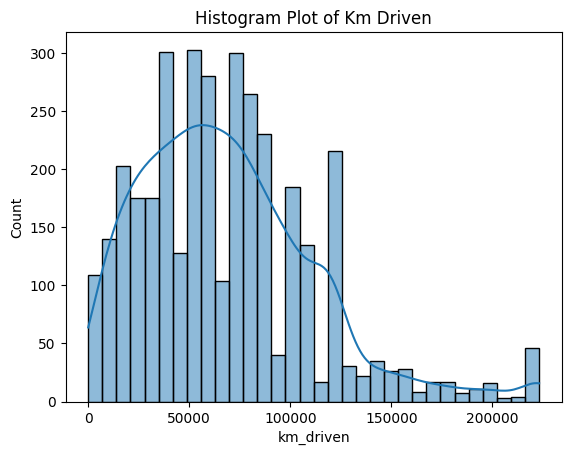

In [45]:
sns.histplot(df['km_driven'],kde=True)
plt.title("Histogram Plot of Km Driven")
plt.show()

**Insights:-**

1. Majority of Data Points at Lower Kilometers Driven:
The majority of vehicles fall within the lower range of kilometers driven (approximately 0 to 50,000 km).
This suggests that many vehicles have relatively low mileage.

2. Decreasing Frequency with Higher Kilometers:
As the number of kilometers increases, the frequency of vehicles decreases significantly. Fewer vehicles have higher kilometers driven, indicating that older or more extensively used vehicles are less common.

3. Periodic Peaks and Troughs:
The histogram shows periodic peaks and troughs. This pattern might correspond to common thresholds or intervals at which vehicles are sold or considered for resale.

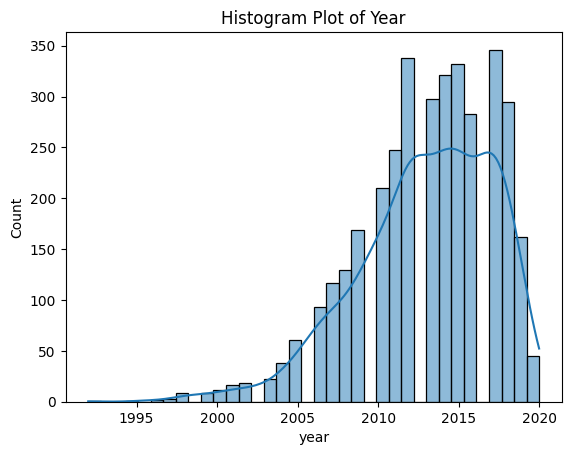

In [46]:
sns.histplot(df['year'],kde=True)
plt.title("Histogram Plot of Year")
plt.show()

**Insights:-**

1. Increasing Trend (1995 to 2010): The frequency appears to increase from around 1995 up until just after 2010. This suggests that whatever is being measured experienced growth during this period.

2. Peak and Decline (Around 2010): After reaching a peak slightly after 2010, there is a noticeable decline in frequency. This indicates a shift in the trend or behavior of the measured variable.

3. Common Years (2005 to 2010): The most frequent year range lies between approximately 2005 and just after 2010. This period represents when the measured variable was most common.

#### **Univariate Data Analysis of Categorical Columns.**

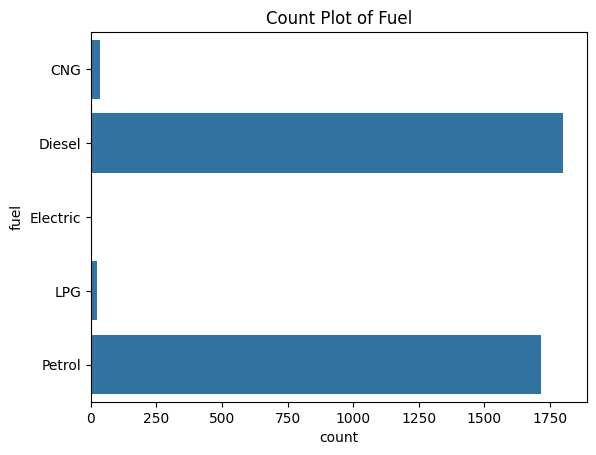

In [47]:
sns.countplot(df['fuel'].sort_values())
plt.title('Count Plot of Fuel')
plt.show()

**Insights:-**
1. Diesel Dominance: Diesel is the most prevalent fuel type among the cars represented in the plot. Its count significantly surpasses that of any other fuel type.
2. Petrol Usage: Petrol ranks second in popularity, with approximately half as many cars using it compared to petrol.
3. Electric Vehicles: Electric vehicles have the lowest count, indicating they are the least common among the selected cars.

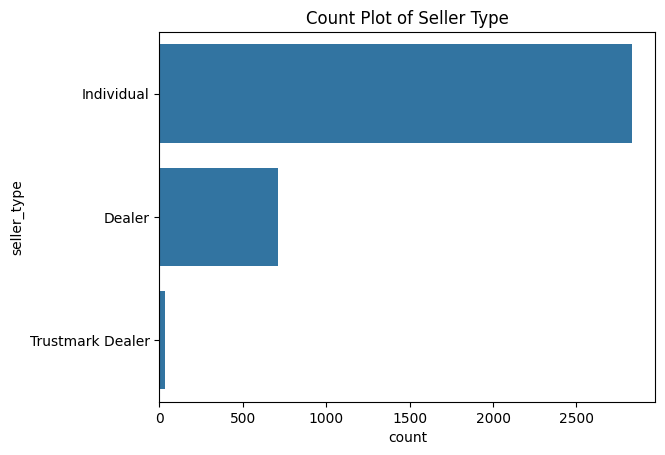

In [48]:
sns.countplot(df['seller_type'])
plt.title('Count Plot of Seller Type')
plt.show()

**Insights:-**
1. Individual Sellers Dominance: The majority of car sellers fall into the "Individual" category. Their count significantly surpasses that of dealers and trustmark dealers.

2. Dealer Representation: Dealers, while fewer in number compared to individual sellers, still constitute a substantial portion of the dataset. Their count is approximately half of the individual sellers.

3. Trustmark Dealers Rarity: Trustmark dealers are the least common among the three types. Their count is notably lower, suggesting they represent a specialized or premium segment in the car market.

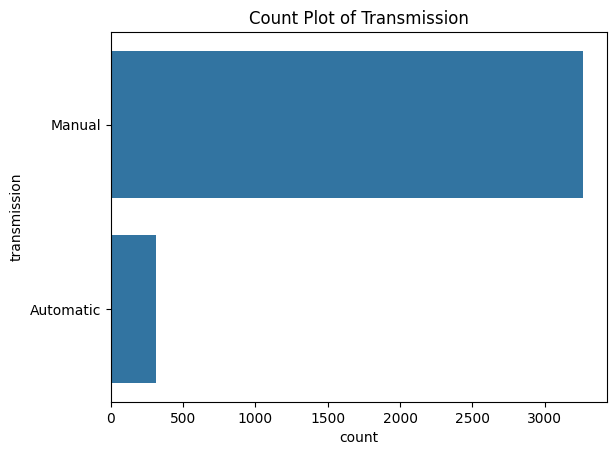

In [49]:
sns.countplot(df['transmission'])
plt.title('Count Plot of Transmission')
plt.show()

**Insights:-**
1. The 'Manual' category has a significantly higher count compared to the 'Automatic' category, suggesting that manual transmissions are more prevalent in the dataset being analyzed.
2. The difference in counts between the two categories indicates a possible preference or higher occurrence of manual transmission vehicles.
3. Since there are only two categories presented, it implies that the dataset may be focused on comparing these two types of transmissions exclusively.

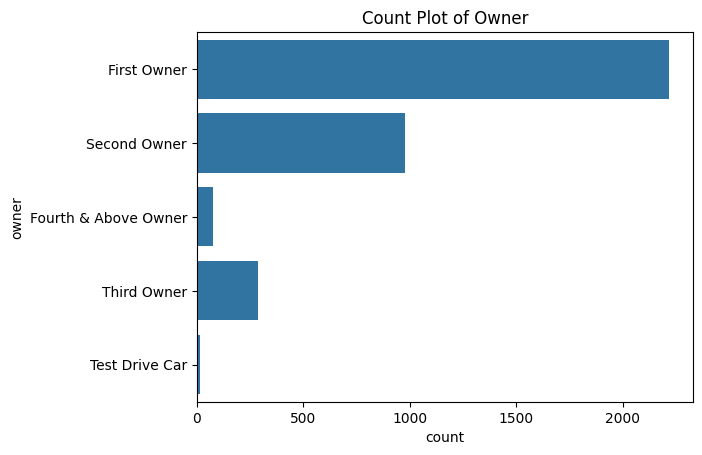

In [50]:
sns.countplot(df['owner'])
plt.title('Count Plot of Owner')
plt.show()

**Insights:-**
1. Cars owned by their first owner constitute the majority, as indicated by the longest bar.
2. There is a little-bit descending order in terms of count; as ownership transfers from first to fourth or above owners, fewer cars fall into each subsequent category.
3. The drastic difference in length between bars suggests that there is a significant drop-off in count after each transfer of ownership.

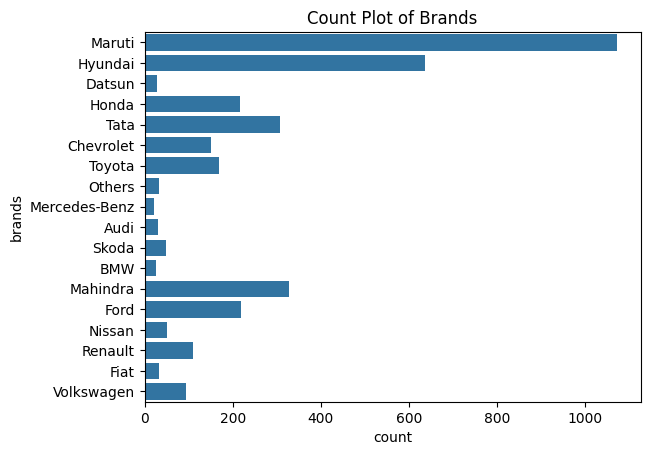

In [51]:
sns.countplot(df['brands'])
plt.title('Count Plot of Brands')
plt.show()

**Insights:-**
1. Brand Distribution: The chart reveals that 'Maruti' and 'Hyundai' are the dominant car brands, with significantly higher counts compared to others. These two brands seem to be popular within the dataset.
2. Long Tail of Brands: Beyond the top two, there is a long tail of various car brands with lower counts. Brands like 'Honda', 'Datsun/Nissan', and 'Toyota' fall into this category.
3. Mercedes-Benz Rarity: Mercedes-Benz has least numbers values in the car brands.

4. Cumulative "Others" Category: The "others" category represents a collective count for various car brands with low individual occurrences. While these models don't stand out individually, their combined presence contributes significantly to the dataset.

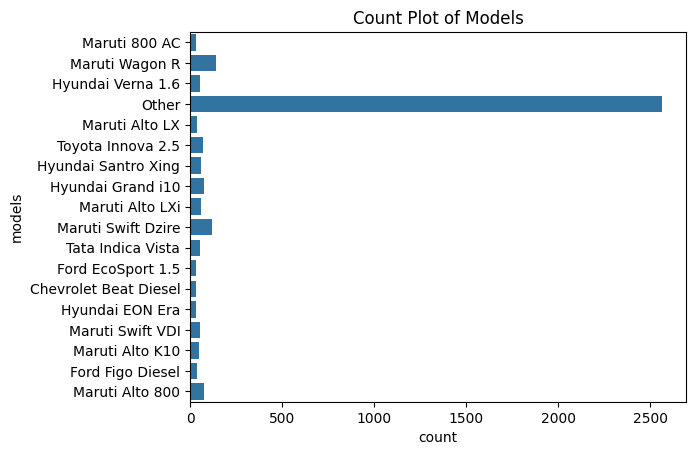

In [52]:
sns.countplot(df['models'])
plt.title('Count Plot of Models')
plt.show()

**Insights:-**
1. Maruti Wagon R Dominates: The car model "Maruti Wagon R" stands out with the highest count value, indicating it's the most common model in the dataset. Its frequency significantly surpasses other individual car models.

2. Maruti Swift Dzire: Following Maruti Wagon R, the next most frequent model is "Maruti Swift Dzire." However, its count is considerably lower than that of Maruti Wagon R.

3. Ford EcoSport 1.5 Rarity: Ford EcoSport 1.5 has least numbers values in the car models.

4. Cumulative "Others" Category: The "others" category represents a collective count for various car models with low individual occurrences. While these models don't stand out individually, their combined presence contributes significantly to the dataset.

#### **Bivariate Data Analysis of Numerical Columns.**

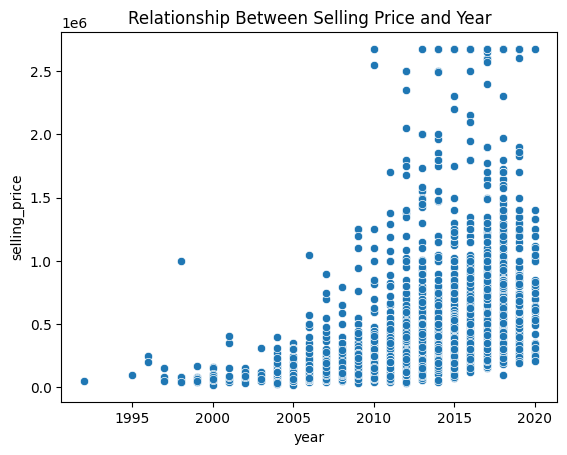

In [53]:
sns.scatterplot(y = df['selling_price'], x = df['year'])
plt.title('Relationship Between Selling Price and Year')
plt.show() 

**Insights:-**
1. Positive Correlation: The plot shows a positive correlation between the year of the car and its selling price. Newer cars tend to have higher selling prices.

2. Increased Data Density: For more recent years, there is a significant increase in data points, suggesting either improved data collection or higher car sales during those years.

3. Greater Price Variability: The spread of data points vertically widens as time progresses, indicating greater variability in selling prices for newer cars compared to older ones.

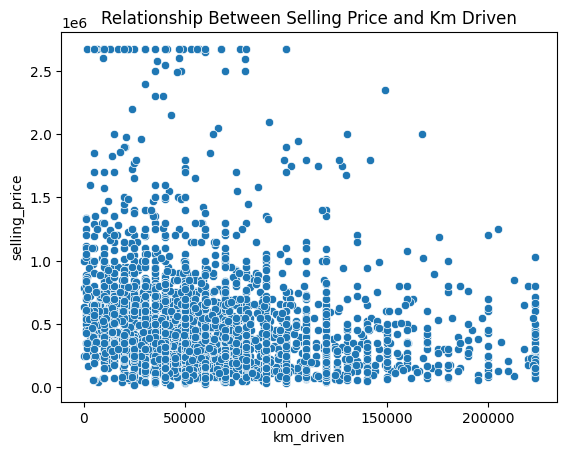

In [54]:
sns.scatterplot(y = df['selling_price'], x = df['km_driven'])
plt.title('Relationship Between Selling Price and Km Driven')
plt.show() 

**Insights:-**
1. Negative Correlation: There appears to be a negative correlation between the selling price of cars and the number of kilometers driven. As the mileage increases, the selling price tends to decrease.

2. Concentration of Data: Most data points cluster in the lower kilometer range, suggesting that cars with lower mileage are more common. This concentration may indicate that buyers prefer cars with less wear and tear.

3. Limited High-Price Cars: Few data points lie above a selling price of 20 (presumably in thousands of currency units), indicating that higher-priced cars are less frequent or retain their value better even with increased mileage.

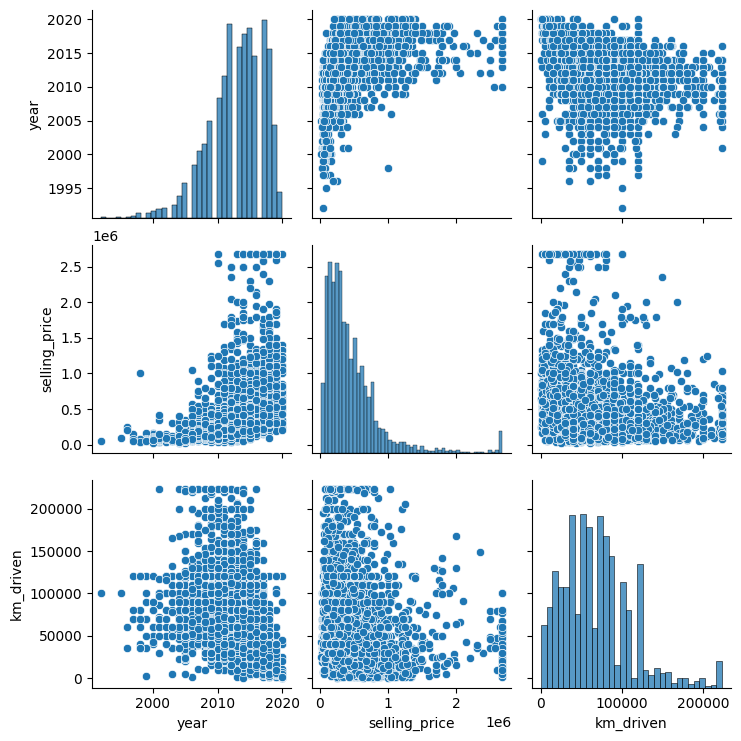

In [55]:
sns.pairplot(df[num_cols])
plt.show() 

**Insights:-**

1. Year vs. Selling Price:
There is a positive correlation between the year of the vehicle and its selling price. Newer cars tend to have higher prices.
The scatterplot shows an upward trend from left to right, indicating this relationship.

2. Selling Price Distribution:
The distribution of selling prices appears right-skewed. Most data points are concentrated at lower prices, with fewer high-priced vehicles.

3. Kilometers Driven vs. Other Variables:
There is no clear pattern or correlation between kilometers driven and year or selling price. These variables seem independent of each other.

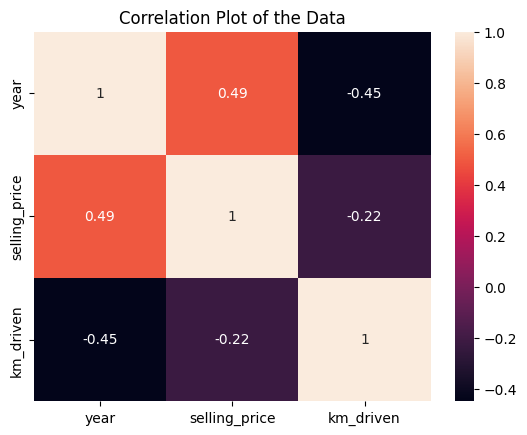

In [56]:
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title('Correlation Plot of the Data')
plt.show() 

**Insights:-**

1. Year vs. Selling Price:
There is a moderate positive correlation (0.49) between ‘year’ and ‘selling_price’, suggesting that as the year increases, there’s a tendency for selling prices to increase as well.
The scatterplot shows an upward trend from left to right, indicating this relationship.

2. Selling Price Distribution:
The distribution of selling prices appears right-skewed. Most data points are concentrated at lower prices, with fewer high-priced vehicles.

3. Kilometers Driven vs. Other Variables:
There is a moderate negative correlation (-0.45) between ‘year’ and ‘km_driven’, indicating that newer models (higher year values) tend to have lower kilometers driven.
The negative correlation (-0.22) between ‘selling_price’ and ‘km_driven’ suggests that vehicles with higher kilometers driven tend to have lower selling prices, although this relationship is weaker compared to others.

#### **Bivariate Data Analysis of Numerical-Categorical Columns.**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18628\1943963078.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = df['km_driven'], y = df['fuel'], ci=False)


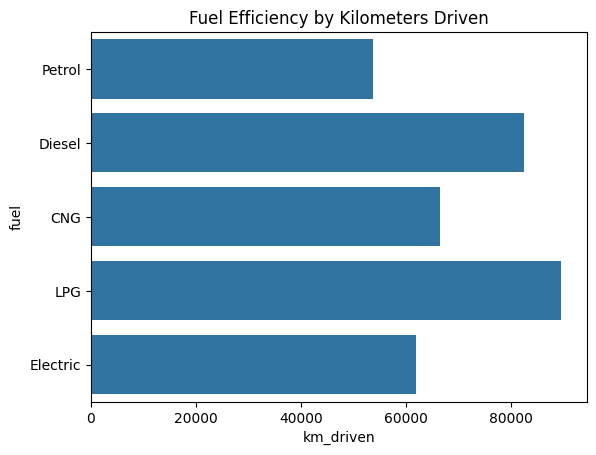

In [57]:
sns.barplot(x = df['km_driven'], y = df['fuel'], ci=False)
plt.title("Fuel Efficiency by Kilometers Driven")
plt.show() 

**Insights:-**

1. LPG Vehicles Show the Highest Kilometers Driven:
Vehicles using LPG as fuel have the highest kilometers driven, indicating they are potentially more fuel-efficient or commonly used for longer distances compared to other fuel types.

2. Diesel Vehicles Also Have High Kilometers Driven:
Diesel vehicles also show a high number of kilometers driven, second only to LPG vehicles. This aligns with the common usage of diesel vehicles for long-distance and heavy-duty purposes.

3. Electric Vehicles Have Relatively Lower Kilometers Driven:
Electric vehicles have fewer kilometers driven compared to LPG and diesel vehicles. This could be due to the current limitations in range and charging infrastructure for electric vehicles.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18628\128716398.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = df['selling_price'], y = df['fuel'], ci=False)


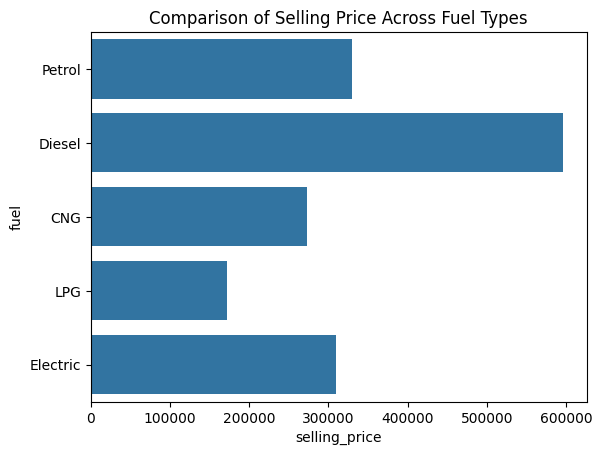

In [58]:
sns.barplot(x = df['selling_price'], y = df['fuel'], ci=False)
plt.title("Comparison of Selling Price Across Fuel Types")
plt.show() 

**Insights:-**

1. Diesel Vehicles Have the Highest Selling Prices:
Vehicles powered by diesel have the highest average selling prices, indicating a higher market value compared to other fuel types.

2. Electric Vehicles Have Substantially High Selling Prices:
Electric vehicles also have high selling prices, though not as high as diesel vehicles. This reflects the higher cost of electric vehicle technology and the growing market demand for them.

3. LPG Vehicles Have the Lowest Selling Prices:
Vehicles using LPG as fuel have the lowest selling prices. This could be due to a variety of factors such as lower market demand, older vehicle models, or lower perceived value.

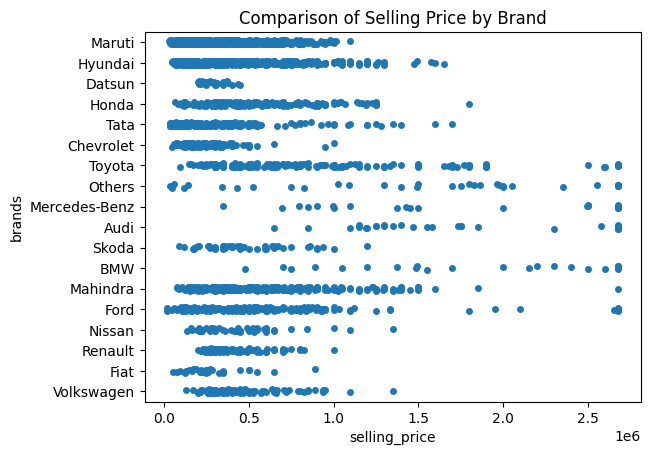

In [59]:
sns.stripplot(x = df['selling_price'], y = df['brands'])
plt.title("Comparison of Selling Price by Brand")
plt.show() 

**Insights:-**

1. Luxury Brands Have Higher Selling Prices:
Brands such as Mercedes-Benz, BMW, and Audi show higher selling prices compared to other brands. This is expected as these brands are known for their luxury vehicles, which typically have a higher market value.

2. Economy Brands Have Lower Selling Prices:
Brands like Maruti, Tata, and Hyundai generally have lower selling prices. These brands are known for producing more affordable and economical vehicles, which is reflected in their lower market prices.

3. Wide Range of Prices for Certain Brands:
Brands like Toyota and Ford exhibit a wide range of selling prices, indicating that these brands offer a diverse range of vehicles from economical to higher-end models. This diversity can attract a broad customer base with varying budget preferences.

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 81.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

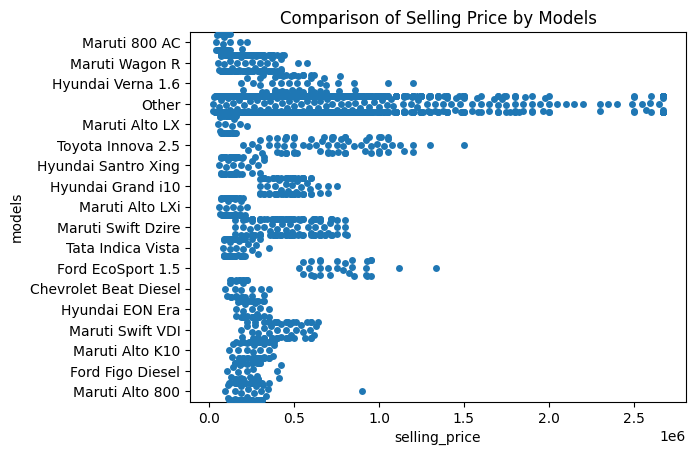

In [60]:
sns.swarmplot(x = df['selling_price'], y = df['models'])
plt.title("Comparison of Selling Price by Models")
plt.show()  

**Insights:-**

1. Price Range and Outliers:
Most models have selling prices concentrated below 0.5 million (5 lakhs), indicating that these cars are generally more affordable.
There are a few outliers for models like Hyundai Verna 1.6 and Toyota Innova 2.5, with selling prices exceeding 1.0 million (10 lakhs), indicating higher-end or well-maintained cars.

2. Diverse Price Distribution:
The "Other" category shows a wide distribution of selling prices, spanning from low to high, which suggests a mix of various car models with varying conditions and features within this category.
Models like Maruti Alto 800 and Hyundai EON Era have selling prices tightly clustered at the lower end, indicating their budget-friendly nature.

3. Popular Models:
Maruti Suzuki models (e.g., Maruti 800 AC, Maruti Wagon R, Maruti Alto LX, etc.) are prevalent in the plot, showing a significant number of data points. This indicates their popularity and possibly a large volume of these cars being sold in the market.

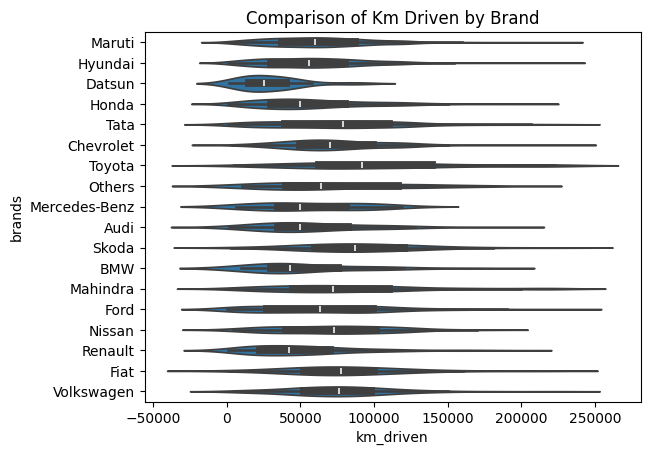

In [61]:
sns.violinplot(x = df['km_driven'], y = df['brands'])
plt.title("Comparison of Km Driven by Brand")
plt.show() 

**Insights:-**

1. Median and Distribution Range:
    Most brands have a wide range of kilometers driven, with medians typically around the 50,000 km mark.
    Brands like Datsun, Chevrolet, and Renault have a narrower distribution, indicating more consistency in the kilometers driven among cars of these brands.

2. High Mileage Vehicles:
    Brands like Ford, Mahindra, and Maruti show a significant number of vehicles with high mileage (close to or above 200,000 km), suggesting that these brands have vehicles that are driven extensively.

3. Luxury Brands with Lower Usage:
    Luxury brands like Mercedes-Benz, Audi, BMW, and Skoda tend to have a tighter distribution with fewer high mileage vehicles, indicating that cars from these brands are generally driven less compared to more common brands like Maruti and Hyundai. This could be due to their usage as secondary or leisure vehicles rather than primary daily drivers.

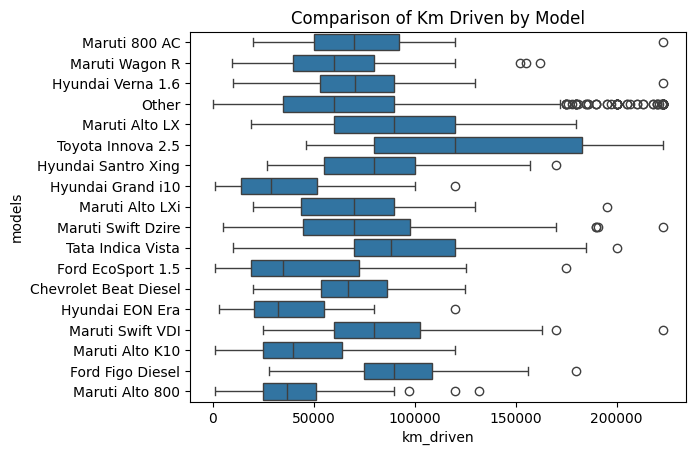

In [62]:
sns.boxplot(x = df['km_driven'], y = df['models'])
plt.title("Comparison of Km Driven by Model")
plt.show() 

**Insights:-**

1. Wide Range of Kilometers Driven:
   Models such as the Toyota Innova 2.5 and Hyundai Verna 1.6 show a wide range in kilometers driven, with the Innova having many high-mileage vehicles (several outliers above 200,000 km). This indicates these models are often driven extensively, likely due to their durability and suitability for long-distance travel.

2. Concentrated Usage in Certain Models:
   Models like the Maruti Alto 800, Hyundai EON Era, and Maruti Alto K10 have a narrower interquartile range (IQR), indicating that these cars are more consistently driven within a specific range of kilometers. These models also tend to have lower medians compared to others, suggesting they are used less intensively.

3. Outliers in High Usage:
   Several models, including the Maruti Swift VDI, Ford EcoSport 1.5, and Hyundai Grand i10, exhibit significant outliers with high kilometers driven. This suggests that while the bulk of these cars are driven within a moderate range, there are a number of them that are used much more extensively, perhaps as fleet vehicles or by users with higher travel needs.

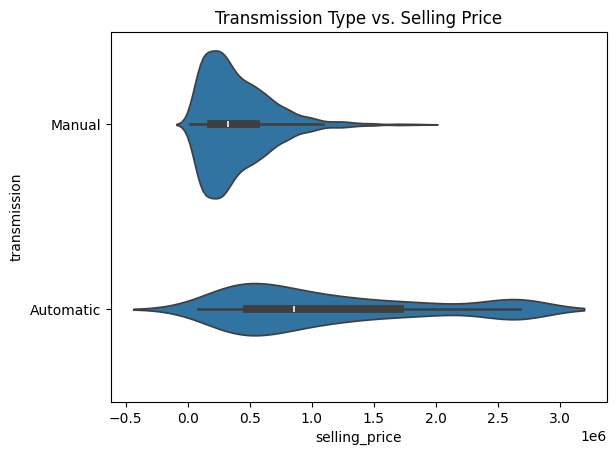

In [63]:
sns.violinplot(x = df['selling_price'], y = df['transmission'])
plt.title("Transmission Type vs. Selling Price")
plt.show() 

**Insights:-**

1. Variability in Prices:
   The distribution of selling prices for vehicles with automatic transmission is wider than for those with manual transmission. This indicates greater variability in the prices of automatic vehicles.
2. Median Selling Price:
   The median selling price for automatic vehicles appears to be higher than that for manual ones. The white dot within the thicker part of each violin represents the median.
3. High-Priced Outliers:
   There is a longer tail on the higher end of the selling price range for automatic vehicles. This suggests that there are more high-priced outliers in the automatic category compared to the manual one.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18628\2142278370.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = df['owner'], y = df['km_driven'], ci=False)


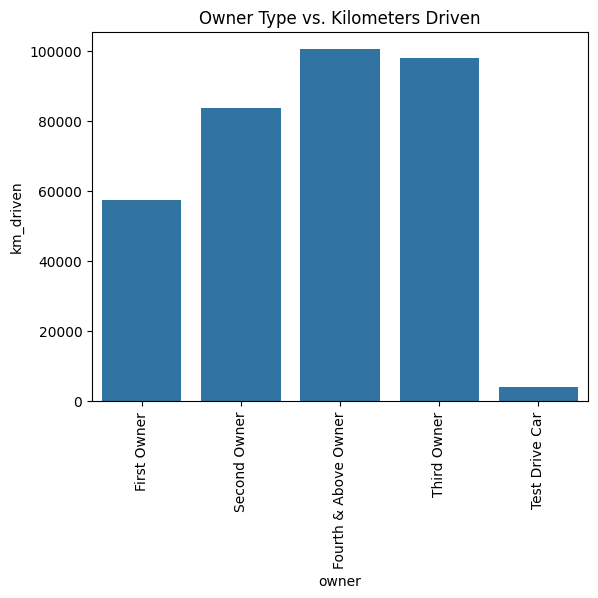

In [64]:
sns.barplot(x = df['owner'], y = df['km_driven'], ci=False)
plt.title("Owner Type vs. Kilometers Driven")
plt.xticks(rotation=90)
plt.show()    

**Insights:-**

1. First Owner Mileage:
   Vehicles owned by the 'First Owner' have been driven the least amount of kilometers compared to other categories.
2. Increasing Trend with Ownership:
   As ownership passes from first to third owners, there is an increasing trend in the number of kilometers driven.
3. Test Drive Cars:
   Interestingly, 'Test Drive Car' category vehicles have been driven approximately as much as those owned by the 'Third Owner.' This suggests that test drive cars are extensively used.

#### **Bivariate Data Analysis of Categorical Columns.**

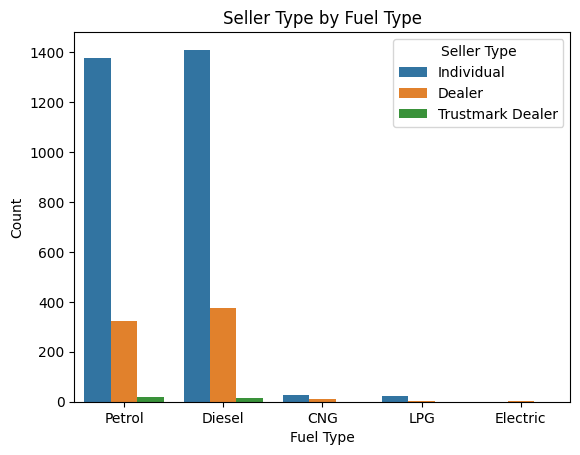

In [65]:
sns.countplot(x='fuel', hue='seller_type', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Seller Type by Fuel Type')
plt.legend(title='Seller Type')
plt.show()

**Insignts:-**

1. Individual Sellers Dominating Petrol and Diesel Sales:
   Individual sellers have the highest count of petrol and diesel vehicles sold.
   Dealers and Trustmark Dealers lag behind in these fuel types.

2. Limited Sales for CNG, LPG, and Electric Vehicles:
   Across all seller types, there are very few or no sales recorded for CNG, LPG, and Electric vehicles.
   Trustmark Dealers show negligible sales in these alternative fuel types.

3. Overall Decrease in Non-Petrol/Diesel Sales:
   The overall count of vehicles sold decreases significantly for fuel types other than Petrol and Diesel.

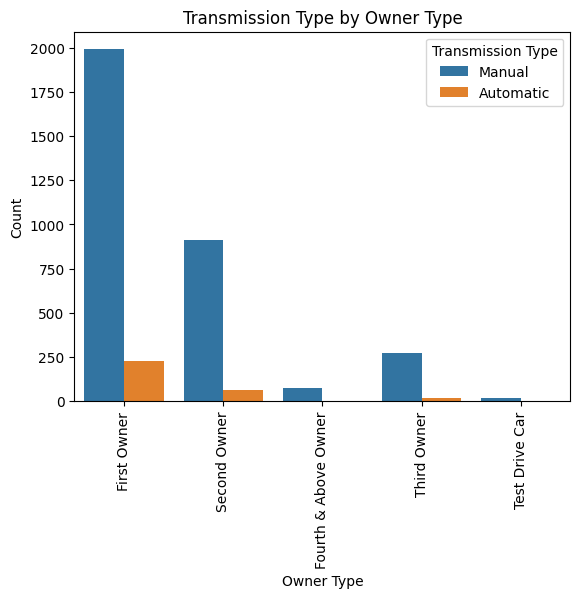

In [66]:
sns.countplot(x='owner', hue='transmission', data=df)
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.title('Transmission Type by Owner Type')
plt.legend(title='Transmission Type')
plt.xticks(rotation=90)
plt.show()

**Insights:-**

1. First Owners Dominate Both Manual and Automatic Transmissions:
   First owners have the highest count of both manual and automatic transmissions.
   Manual transmissions are significantly more common among first owners than automatic transmissions.

2. Decrease in Transmission Count with Previous Owners:
   As the number of previous owners increases, the count for both types of transmissions decreases markedly.
   Second, third, and fourth & above owners show progressively lower transmission counts.

3. Automatic Transmissions More Common Overall:
   Across all owner types, automatic transmissions are more prevalent than manual transmissions.

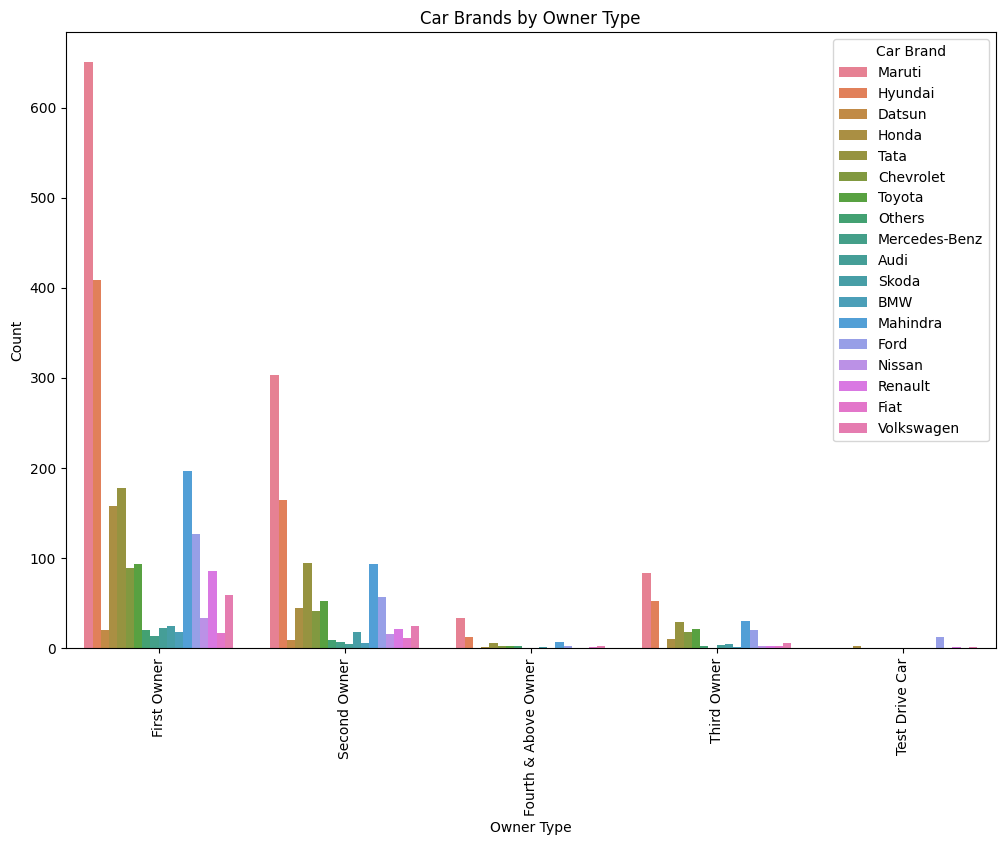

In [67]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['owner'],hue=df['brands'])
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.title('Car Brands by Owner Type')
plt.legend(title='Car Brand')
plt.xticks(rotation=90)
plt.show()  

**Insights:-**

1. Maruti and Hyundai Dominate First Owners:
   Maruti and Hyundai have significantly higher counts for first owners compared to other car brands.
   These brands dominate the market for new car buyers.

2. Decrease in Car Count with Previous Owners:
   As the number of previous owners increases (from first to third owner), there is a noticeable decrease in the count for all car brands.
   First owners consistently have the highest count across all brands.

3. Luxury Brands Have Minimal Presence:
   Luxury brands like Mercedes Benz and BMW have low counts overall compared to more common brands.
   However, they still appear in the 'First Owner' category, indicating new purchases.

#### **Saving the Cleaned or Preprocessed Data for performing the Machine Learning Algorithms.**

In [69]:
df.to_csv('Car Details 2.csv', index=False)